In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [60]:
mouse_metadata_filepath = "data/Mouse_metadata.csv"
study_results_filepath = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_filepath)
study_results = pd.read_csv(study_results_filepath)
# mice_count = len(mouse_metadata["Mouse ID"].unique())
# mice_count

combined_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_study_data
# mouse_metadata.tail()
# study_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
number_of_mice = len(combined_study_data["Mouse ID"].value_counts())
number_of_mice

249

In [8]:
duplicated_mice_id = combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [9]:
clean_combined_data = combined_study_data[combined_study_data['Mouse ID'].isin(duplicated_mice_id) == False]
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
number_of_mice = len(clean_combined_data["Mouse ID"].value_counts())
number_of_mice

248

# Summary Statistics

Same code as cell after it. just using for loop to iterate over Regimens.

In [11]:
drug_list = clean_combined_data['Drug Regimen'].unique()
regimen_series = []
for drug in drug_list:
    tumor_volume = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
    regimen_series.append(tumor_volume)
summary_vol = pd.concat(regimen_series, keys=drug_list, axis=1).T
print(summary_vol)

mean     median        var       std       sem
Ramicane   40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
Placebo    54.033581  52.288934  61.168083  7.821003  0.581331
Ceftamin   52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn   54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril   55.235638  53.698743  68.553577  8.279709  0.603860
Propriva   52.320930  50.446266  43.852013  6.622085  0.544332
Naftisol   54.331565  52.509285  66.173479  8.134708  0.596466


In [36]:
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane','Stelasyn', 'Zoniferol']
tumor_volume3 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume4 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ketapril', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume5 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Naftisol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume2 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume6 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Placebo', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume7 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Propriva', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume8 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume9 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Stelasyn', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume10 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Zoniferol', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume1 = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table_list = ([tumor_volume1, tumor_volume2, tumor_volume3, tumor_volume4, tumor_volume5, tumor_volume6, tumor_volume7, tumor_volume8, tumor_volume9, tumor_volume10])
summary_table = pd.concat(summary_table_list, keys=drug_list, axis=1).T
summary_table

,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [14]:
summary_stat = clean_combined_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [15]:
bar_plot_data = clean_combined_data.groupby("Drug Regimen")['Drug Regimen'].count()
bar_plot_data = bar_plot_data.sort_values(ascending=False)
bar_plot_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Drug Regimen vs Number of Mice')

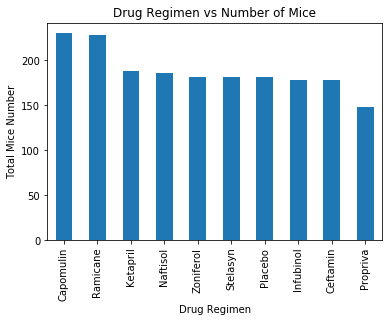

In [16]:
bar_chart = bar_plot_data.plot.bar()
bar_chart.set_ylabel('Total Mice Number')
bar_chart.set_title('Drug Regimen vs Number of Mice')

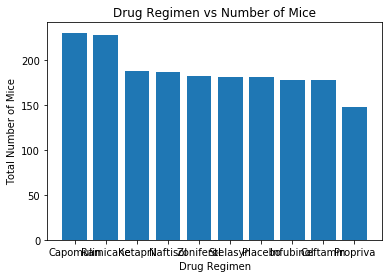

In [17]:
mice_number = bar_plot_data.keys()
plt.bar(mice_number, bar_plot_data, align='center')
plt.title('Drug Regimen vs Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.show()

In [18]:
pie_chart_data = clean_combined_data.groupby('Sex')['Sex'].count()
pie_chart_data = pie_chart_data.sort_values(ascending=False)
pie_chart_data

Sex
Male      958
Female    922
Name: Sex, dtype: int64

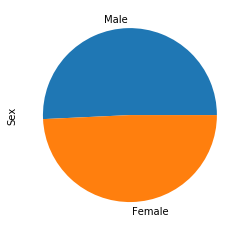

In [16]:
pie_chart = pie_chart_data.plot.pie()

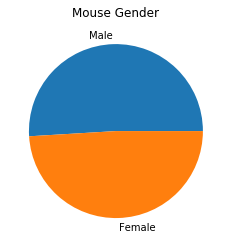

In [19]:
labels = ['Male', 'Female']
plt.pie(pie_chart_data, labels=labels)
plt.title('Mouse Gender')
plt.show()

# Quartiles, Outliers and Boxplots

In [20]:
max_df = clean_combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
max_merge = clean_combined_data.merge(max_df, on=['Mouse ID', 'Timepoint'])
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
# treatments_list = max_merge['Drug Regimen'].unique()
treatments_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
tumor_vol_list = [] 
for drug in treatments_list:
    final_tumor_vol = max_merge.loc[max_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append( final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[( final_tumor_vol < lower_bound)|( final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


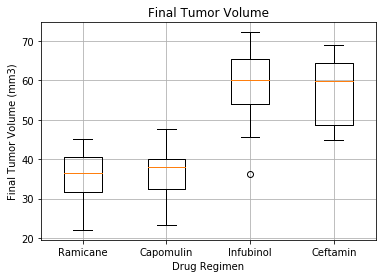

In [59]:
plt.boxplot(tumor_vol_list)
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.grid()
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])
plt.show()

# Line and Scatter Plots

In [28]:
columns = ["Drug Regimen","Weight (g)",  "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
plot_data = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin", columns]
plot_data

,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3),Mouse ID
10,Capomulin,17,0,45.000000,s185
11,Capomulin,17,5,43.878496,s185
12,Capomulin,17,10,37.614948,s185
13,Capomulin,17,15,38.177232,s185
14,Capomulin,17,20,36.866876,s185
...,...,...,...,...,...
440,Capomulin,24,45,47.685963,i557
1452,Capomulin,25,0,45.000000,r157
1453,Capomulin,25,5,45.597064,r157
1454,Capomulin,25,10,46.059608,r157


In [61]:
columns2 = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]
line_plot_data = plot_data.loc[plot_data["Mouse ID"] == "s185", columns2] #data for Mouse ID s185.
line_plot_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


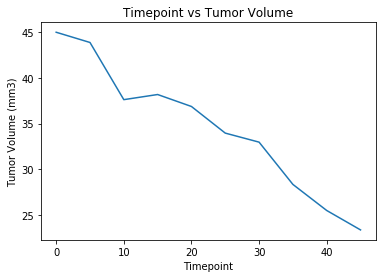

In [62]:
x_axis = line_plot_data['Timepoint']
y_axis = line_plot_data['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs Tumor Volume')
plt.show()

In [31]:
linear_corr = plot_data.groupby('Weight (g)').mean()
linear_corr = linear_corr.reset_index()
linear_corr

,Weight (g),Timepoint,Tumor Volume (mm3)
0,15,22.500000,36.182040
1,17,21.538462,37.214133
2,19,22.500000,41.182391
3,20,22.500000,39.141053
4,21,21.666667,42.088700
5,22,22.500000,43.288490
6,23,20.217391,43.341051
7,24,22.500000,44.805810
8,25,18.214286,44.062109


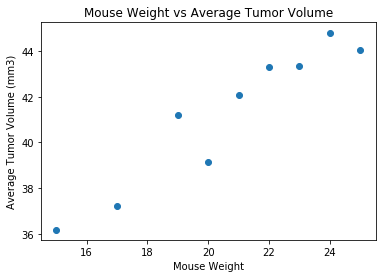

In [32]:
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

# Correlation and Regression

The correlation coefficient is 0.95


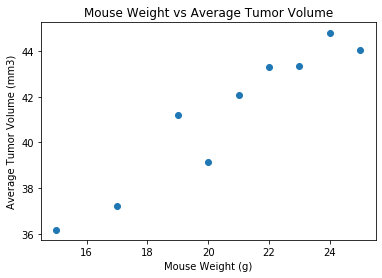

In [33]:
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

R squared is: 0.9034966277438606
y = 0.89x + 22.76


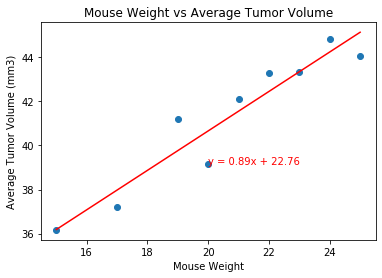

In [34]:
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"R")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20, 39.14),fontsize=10,color="red")
plt.title('Mouse Weight vs Average Tumor Volume')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()